In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
dataset_path = "/kaggle/input/titaniccsv/DecisionTrees_titanic.csv"

In [42]:
dataset = pd.read_csv(dataset_path)

In [43]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


In [44]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Sex,183.0,0.519126,0.501005,0.00,0.0,1.0,1.0,1.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292
Embarked,183.0,1.278689,0.957294,0.00,0.0,2.0,2.0,2.0000


In [45]:
X = dataset.drop("Survived", axis=1)
y = dataset.loc[:, "Survived"]

In [46]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [47]:
decision_tree = DecisionTreeClassifier()

In [48]:
random_forest = RandomForestClassifier()

In [49]:
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [50]:

random_forest.fit(train_X, train_y)

RandomForestClassifier()

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4444444444444444, 0.875, 'Sex <= 0.5\nsamples = 128\nvalue = [42, 86]'),
 Text(0.2222222222222222, 0.625, 'Fare <= 10.5\nsamples = 60\nvalue = [4, 56]'),
 Text(0.1111111111111111, 0.375, 'samples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.375, 'Age <= 3.0\nsamples = 58\nvalue = [2, 56]'),
 Text(0.2222222222222222, 0.125, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.125, '\n  (...)  \n'),
 Text(0.6666666666666666, 0.625, 'Age <= 17.5\nsamples = 68\nvalue = [38, 30]'),
 Text(0.5555555555555556, 0.375, 'samples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.375, 'Age <= 24.5\nsamples = 64\nvalue = [38, 26]'),
 Text(0.6666666666666666, 0.125, '\n  (...)  \n'),
 Text(0.8888888888888888, 0.125, '\n  (...)  \n')]

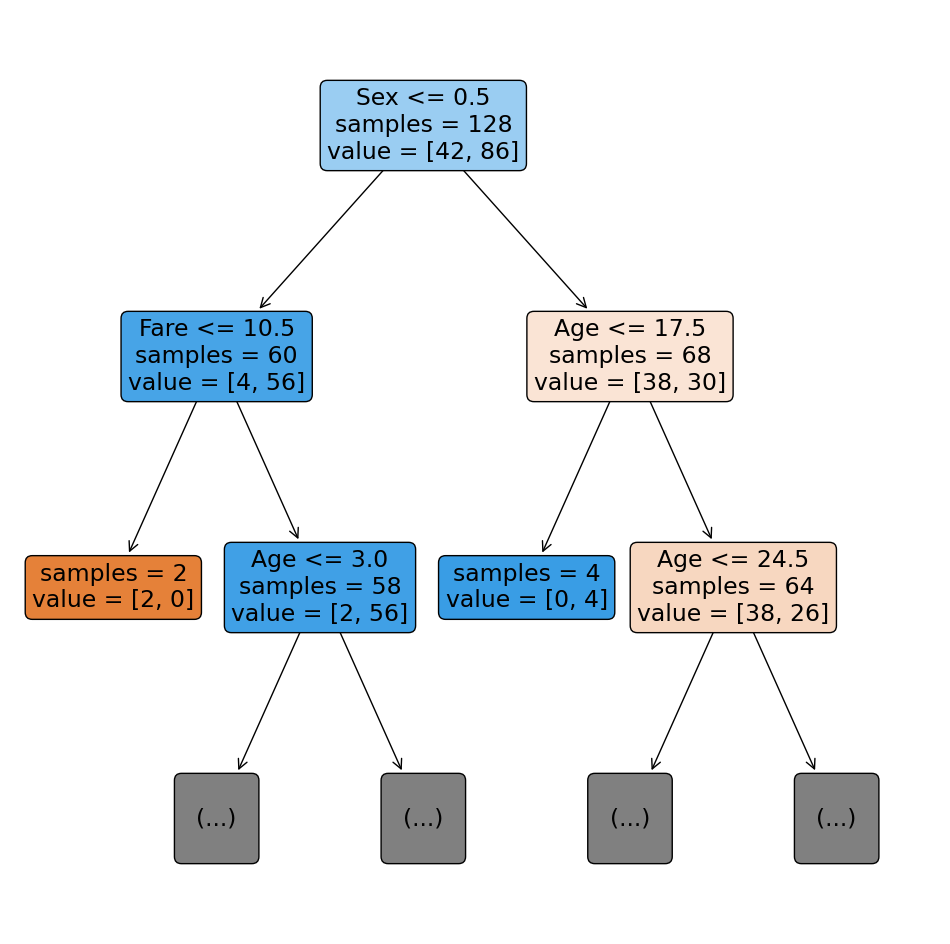

In [67]:
fig = plt.figure(figsize=(12,12))
plot_tree(decision_tree,
         max_depth=2,
         feature_names=X.columns,
         filled=True,
         impurity=False,
         rounded=True,
         precision=1)

In [63]:
decisiontree_pred = decision_tree.predict(test_X)
random_forest_pred = random_forest.predict(test_X)

In [64]:
print(classification_report(test_y, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.76      0.86      0.81        37

    accuracy                           0.73        55
   macro avg       0.69      0.65      0.66        55
weighted avg       0.71      0.73      0.71        55



In [65]:
print(classification_report(test_y, random_forest_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57        18
           1       0.78      0.95      0.85        37

    accuracy                           0.78        55
   macro avg       0.79      0.70      0.71        55
weighted avg       0.79      0.78      0.76        55

